# 600_prep_missing_values

## Purpose
In this notebook we will get started on the cleaning and validating our data, focusing mainly on dealing with missing values in our datasets.

## Notebook Contents:
* __1:__ Loading the Datasets
   
* __2:__ Handling Missing Data

* __3:__ Dataset 1979-2004 (c)
    * __3.1:__ Locating Missing Data
    * __3.2:__ Handling Null Values


* __4:__ Dataset 1979-2004 (d)
    * __4.1:__ Locating Missing Data
    * __4.2:__ Handling Null Values
    
* __5:__ Dataset 2015-2016
    * __2.1:__ Locating Missing Data
    * __2.2:__ Handling Null Values
    
    
* __6:__ Saving Data to Pickle Files

* __7:__ Creating Data Dictionaries

## Datasets
__Input:__
* 400_mapping_values_7904c.pkl   (data for years 1979-2004 (c) with mapped strings)
* 400_mapping_values_7904d.pkl (data for years 1979-2004 (d) with mapped strings)
* 400_mapping_values_1516.pkl   (data for years 2015-2016 with mapped strings)


__Output:__ The following pickle files contain the data with the missing values removed. The data is for the years 1979-2004 and 2015-2016. Each pickle file only contains the columns needed to answer the research question that data is being used for, (e.g.): Where it says Q2B in the pickle name that data is to be used to answer research Q2 part B.
_Note:_ In this notebook we are prepping the null values only for parts c and d of the full 1979-2004 dataset (we had to break it up into 4 sections (a,b,c,d) as it was such a big dataset).
* 600_prep_missing_values_7904c_Q1AB.pkl, 600_prep_missing_values_7904c_Q2A.pkl,  600_prep_missing_values_7904c_Q2B.pkl, 600_prep_missing_values_7904c_Q3A.pkl, 600_prep_missing_values_7904c_Q3B.pkl, 600_prep_missing_values_7904d_Q1AB.pkl, 600_prep_missing_values_7904d_Q2A.pkl, 600_prep_missing_values_7904d_Q2B.pkl, 600_prep_missing_values_7904d_Q3A.pkl, 600_prep_missing_values_7904d_Q3B.pkl, 600_prep_missing_values_1516_Q1AB.pkl, 600_prep_missing_values_1516_Q2A.pkl, 600_prep_missing_values_1516_Q2B.pkl, 600_prep_missing_values_1516_Q3A.pkl, 600_prep_missing_values_1516_Q3B.pkl

In [1]:
import os
import sys

import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.helpers import data_dictionary

%matplotlib inline

# 1. Loading the Datasets

In [2]:
df7904c = pd.read_pickle('../../data/processed/400_mapping_values_7904c.pkl')
df7904c.shape

(2999999, 27)

In [3]:
df7904d = pd.read_pickle('../../data/processed/400_mapping_values_7904d.pkl')
df7904d.shape

(1981967, 27)

In [4]:
df1516 = pd.read_pickle('../../data/processed/400_mapping_values_1516.pkl')
df1516.shape

(479548, 27)

# 2. Handling Missing Data

Handling missing data is one of the most important elements of the data cleaning process. Data can be missing for a variety of reasons. For example in our road accident dataset 1979 - 2004 we don't have any data at all for certain columns (purpose of journey, age of vehicle, urban or rural area). For other columns data is sometimes missing; longitude and latitude from the year 1979 to 1998.

For our analysis there are certain key columns for which we need to ensure we have data. These include: Purpose of journey, longitude, latitude, age of vehicle, urban/rural area, IMD decile, driver home area type. 

Pandas makes it easy to remove any rows which have missing data in any of these columns using the dropna method. However, in our datasets we have columns filled with 'unknown', and '-1' which indicate a null/missing value. We will need to iterate through NaN, -1 and unknown values within our datasets.

# 3. Dataset 1979 - 2004 (c)

## 3.1
## Locating Missing Data

First, we will find all occurrences of -1 values and unknown values in each dataset and 'replace' these with NaN value. This will then allow us to look at which columns are impacted the most by missing data by using the Pandas 'isnull' method.

### -1 Values

We will use the 'replace' method to replace all occurrences of -1 values with a NaN value.

In [5]:
df7904c = df7904c.replace(-1, np.NaN)

### Unknown Values

Unknown values in our dataset are defined either by 'unknown' or 'other/unkown (2005-10)'. We will use the 'replace' method to replace all occurrences of such values with a NaN value.

In [6]:
df7904c = df7904c.replace('unknown', np.NaN)

In [7]:
df7904c = df7904c.replace('other/unknown (2005-10)', np.NaN)

### Null Values

Now that we have converted the -1 and unknown values we can use the 'isnull' method to identify which columns are impacted the most by null values.

In [8]:
df7904c.isnull().sum()

Accident_Index                            0
Longitude                           2523720
Latitude                            2523720
Accident_Severity                         0
Number_of_Vehicles                        0
Number_of_Casualties                      0
Date                                      2
Day_of_Week                               0
Time                                    549
Local_Authority_(District)                0
Road_Type                            100468
Speed_limit                               0
Junction_Detail                         359
Light_Conditions                        424
Weather_Conditions                    33677
Road_Surface_Conditions                4230
Special_Conditions_at_Site              902
Urban_or_Rural_Area                  387282
Vehicle_Type                          26413
Vehicle_Manoeuvre                      2179
Vehicle_Location-Restricted_Lane      24105
Journey_Purpose_of_Driver           2999999
Sex_of_Driver                   

Next, we will plot the columns to make it easier to identify which of the columns in the dataset are affected the most. Consequently, this will help us to determine which data is worth keeping and which is not.

In [9]:
df7904c.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

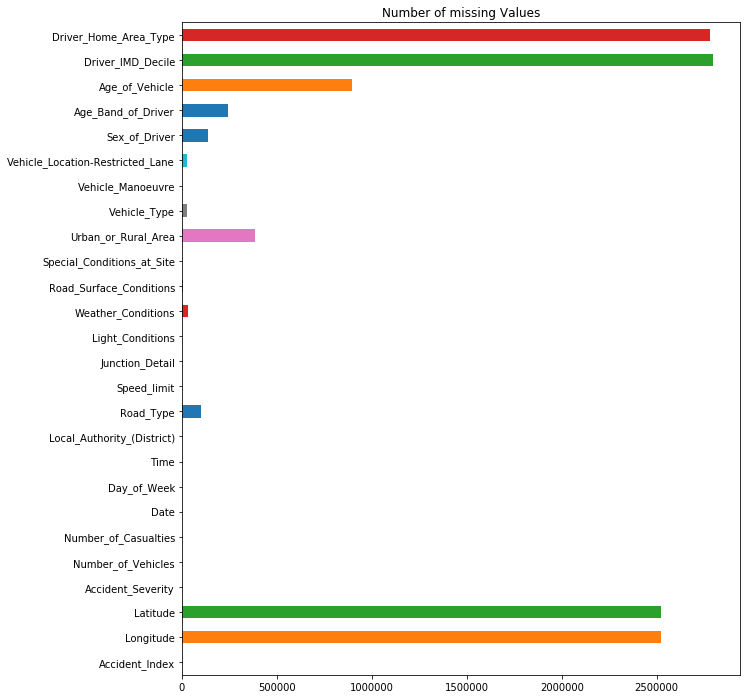

In [10]:
cols =  ['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type']
df7904c[cols].isnull().sum().plot(kind='barh', figsize=(10,12), title='Number of missing Values')

## 3.2
## Handling null values

### Question One:

### (A) and (B)
Directly below are the columns we have decided to use to answer research Q1 parts A and B. We will then make a copy of these columns from the 'df7904c' dataset.

In [11]:
cols_Q1AB = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver']

In [12]:
df_7904c_Q1AB = df7904c[cols_Q1AB].copy()

#### Dropping Rows with Missing Values
We create a new dataframe by using dropna to drop any rows with missing values in the columns provided.

In [13]:
df_7904c_Q1AB.isnull().sum()

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               2
Day_of_Week                        0
Time                             549
Local_Authority_(District)         0
Light_Conditions                 424
Weather_Conditions             33677
Road_Surface_Conditions         4230
Vehicle_Type                   26413
Sex_of_Driver                 135156
Age_Band_of_Driver            241944
dtype: int64

In [14]:
new_7904c_Q1AB = df_7904c_Q1AB.dropna(subset=['Date',
       'Time', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Vehicle_Type', 
       'Sex_of_Driver', 'Age_Band_of_Driver'])

new_7904c_Q1AB.shape

(2695080, 14)

### (C)

Unfortunately for Q1 part C: _"Are people who drive for work more dangerous than recreational drivers?"_ our Journey_Purpose_of_Driver columns is essential for answering this question. Therefore, we cannot use this dataset for this question.

### Question Two:

### (A)
Directly below are the columns we have decided to use to answer research Q2 part A. We will then make a copy of these columns from the 'df7904c' dataset.

In [15]:
cols_Q2A = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver', 'Age_of_Vehicle']

In [16]:
df_7904c_Q2A = df7904c[cols_Q2A].copy()

#### Dropping Rows with Missing Values
We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [17]:
df_7904c_Q2A.isnull().sum()

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               2
Day_of_Week                        0
Time                             549
Local_Authority_(District)         0
Light_Conditions                 424
Weather_Conditions             33677
Road_Surface_Conditions         4230
Special_Conditions_at_Site       902
Vehicle_Type                   26413
Vehicle_Manoeuvre               2179
Sex_of_Driver                 135156
Age_of_Vehicle                895468
dtype: int64

In [18]:
new_7904c_Q2A = df_7904c_Q2A.dropna(subset=['Date',
       'Time', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Vehicle_Type', 
       'Vehicle_Manoeuvre', 'Sex_of_Driver', 'Age_of_Vehicle'])

new_7904c_Q2A.shape

(2033305, 16)

### (B)
Directly below are the columns we have decided to use to answer research Q2 part B. We will then make a copy of these columns from the 'df7904c' dataset.

In [19]:
cols_Q2B = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver']

In [20]:
df_7904c_Q2B = df7904c[cols_Q2B].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [21]:
df_7904c_Q2B.isnull().sum()

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               2
Day_of_Week                        0
Time                             549
Local_Authority_(District)         0
Light_Conditions                 424
Weather_Conditions             33677
Road_Surface_Conditions         4230
Special_Conditions_at_Site       902
Vehicle_Type                   26413
Vehicle_Manoeuvre               2179
Sex_of_Driver                 135156
dtype: int64

In [22]:
new_7904c_Q2B = df_7904c_Q2B.dropna(subset=['Date',
       'Time', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Vehicle_Type', 
       'Vehicle_Manoeuvre', 'Sex_of_Driver'])

new_7904c_Q2B.shape

(2808172, 15)

### Question Three:

### (A)
Directly below are the columns we have decided to use to answer research Q3 part A. We will then make a copy of these columns from the 'df7904c' dataset.

In [23]:
cols_Q3A = ['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Speed_limit',
       'Junction_Detail', 'Urban_or_Rural_Area', 'Vehicle_Type', 
       'Vehicle_Location-Restricted_Lane', 'Sex_of_Driver']

In [24]:
df_7904c_Q3A = df7904c[cols_Q3A].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [25]:
df_7904c_Q3A.isnull().sum()

Accident_Index                            0
Longitude                           2523720
Latitude                            2523720
Accident_Severity                         0
Number_of_Vehicles                        0
Number_of_Casualties                      0
Date                                      2
Day_of_Week                               0
Time                                    549
Local_Authority_(District)                0
Speed_limit                               0
Junction_Detail                         359
Urban_or_Rural_Area                  387282
Vehicle_Type                          26413
Vehicle_Location-Restricted_Lane      24105
Sex_of_Driver                        135156
dtype: int64

In [26]:
new_7904c_Q3A = df_7904c_Q3A.dropna(subset=['Longitude', 'Latitude', 'Date', 'Time','Junction_Detail', 'Urban_or_Rural_Area',    
                                            'Vehicle_Type', 'Vehicle_Location-Restricted_Lane', 'Sex_of_Driver'])

new_7904c_Q3A.shape

(448332, 16)

### (B)
Directly below are the columns we have decided to use to answer research Q3 part B. We will then make a copy of these columns from the 'df7904c' dataset.

In [27]:
cols_Q3B = ['Accident_Index', 'Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 
            'Day_of_Week', 'Local_Authority_(District)','Special_Conditions_at_Site', 'Urban_or_Rural_Area', 'Vehicle_Type', 
            'Sex_of_Driver', 'Driver_IMD_Decile'
           ]

In [28]:
df_7904c_Q3B = df7904c[cols_Q3B].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [29]:
df_7904c_Q3B.isnull().sum()

Accident_Index                      0
Longitude                     2523720
Latitude                      2523720
Number_of_Vehicles                  0
Number_of_Casualties                0
Date                                2
Day_of_Week                         0
Local_Authority_(District)          0
Special_Conditions_at_Site        902
Urban_or_Rural_Area            387282
Vehicle_Type                    26413
Sex_of_Driver                  135156
Driver_IMD_Decile             2798435
dtype: int64

In [30]:
new_7904c_Q3B = df_7904c_Q3B.dropna(subset=['Longitude', 'Latitude', 'Date', 'Special_Conditions_at_Site', 'Urban_or_Rural_Area',
                                            'Vehicle_Type', 'Sex_of_Driver', 'Driver_IMD_Decile'])

new_7904c_Q3B.shape

(199269, 13)

# 4. Dataset 1979 - 2004 (d)

## 4.1
## Locating Missing Data

First, we will find all occurrences of -1 values and unknown values in each dataset and 'replace' these with NaN value. This will then allow us to look at which columns are impacted the most by missing data by using the Pandas 'isnull' method.

### -1 Values

We will use the 'replace' method to replace all occurrences of -1 values with a NaN value.

In [31]:
df7904d = df7904d.replace(-1, np.NaN)

### Unknown Values

Unknown values in our dataset are defined either by 'unknown' or 'other/unkown (2005-10)'. We will use the 'replace' method to replace all occurrences of such values with a NaN value.

In [32]:
df7904d = df7904d.replace('unknown', np.NaN)

In [33]:
df7904d = df7904d.replace('other/unknown (2005-10)', np.NaN)

### Null Values

Now that we have converted the -1 and unknown values we can use the 'isnull' method to identify which columns are impacted the most by null values.

In [34]:
df7904d.isnull().sum()

Accident_Index                            0
Longitude                              4648
Latitude                               4648
Accident_Severity                         0
Number_of_Vehicles                        0
Number_of_Casualties                      0
Date                                      0
Day_of_Week                               0
Time                                    272
Local_Authority_(District)                0
Road_Type                             62128
Speed_limit                               0
Junction_Detail                        1082
Light_Conditions                          9
Weather_Conditions                    27170
Road_Surface_Conditions               11009
Special_Conditions_at_Site             1438
Urban_or_Rural_Area                    6587
Vehicle_Type                          17364
Vehicle_Manoeuvre                      3615
Vehicle_Location-Restricted_Lane       3339
Journey_Purpose_of_Driver           1981967
Sex_of_Driver                   

Next, we will plot the columns to make it easier to identify which of the columns in the dataset are affected the most. Consequently, this will help us to determine which data is worth keeping and which is not.

In [35]:
df7904d.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

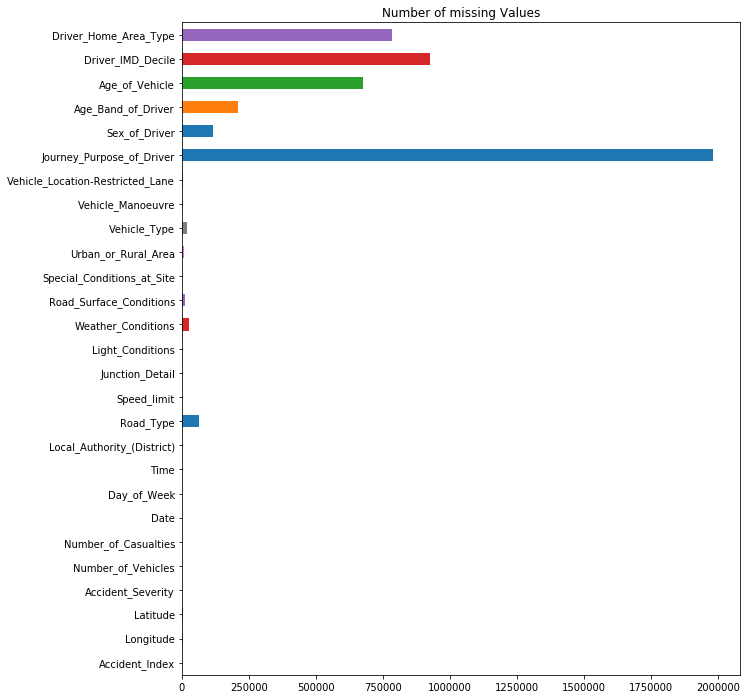

In [36]:
cols =  ['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type']
df7904d[cols].isnull().sum().plot(kind='barh', figsize=(10,12), title='Number of missing Values')

## 4.2
## Handling null values

### Question One:

### (A) and (B)
Directly below are the columns we have decided to use to answer research Q1 parts A and B. We will then make a copy of these columns from the 'df7904d' dataset.

In [37]:
cols_Q1AB = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver']

In [38]:
df_7904d_Q1AB = df7904d[cols_Q1AB].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [39]:
df_7904d_Q1AB.isnull().sum()

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Time                             272
Local_Authority_(District)         0
Light_Conditions                   9
Weather_Conditions             27170
Road_Surface_Conditions        11009
Vehicle_Type                   17364
Sex_of_Driver                 116829
Age_Band_of_Driver            208993
dtype: int64

In [40]:
new_7904d_Q1AB = df_7904d_Q1AB.dropna(subset=['Time', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Vehicle_Type', 'Sex_of_Driver', 'Age_Band_of_Driver'])

new_7904d_Q1AB.shape

(1725560, 14)

### (C)

Unfortunately for Q1 part C: _"Are people who drive for work more dangerous than recreational drivers?"_ our Journey_Purpose_of_Driver columns is essential for answering this question. Therefore, we cannot use this dataset for this question.

### Question Two:

### (A)
Directly below are the columns we have decided to use to answer research Q2 part A. We will then make a copy of these columns from the 'df7904d' dataset.

In [41]:
cols_Q2A = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver', 'Age_of_Vehicle']

In [42]:
df_7904d_Q2A = df7904d[cols_Q2A].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [43]:
df_7904d_Q2A.isnull().sum()

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Time                             272
Local_Authority_(District)         0
Light_Conditions                   9
Weather_Conditions             27170
Road_Surface_Conditions        11009
Special_Conditions_at_Site      1438
Vehicle_Type                   17364
Vehicle_Manoeuvre               3615
Sex_of_Driver                 116829
Age_of_Vehicle                675122
dtype: int64

In [44]:
new_7904d_Q2A = df_7904d_Q2A.dropna(subset=['Time',  'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver', 'Age_of_Vehicle'])

new_7904d_Q2A.shape

(1242776, 16)

### (B)
Directly below are the columns we have decided to use to answer research Q2 part B. We will then make a copy of these columns from the 'df7904d' dataset.

In [45]:
cols_Q2B = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver']

In [46]:
df_7904d_Q2B = df7904d[cols_Q2B].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [47]:
df_7904d_Q2B.isnull().sum()

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Time                             272
Local_Authority_(District)         0
Light_Conditions                   9
Weather_Conditions             27170
Road_Surface_Conditions        11009
Special_Conditions_at_Site      1438
Vehicle_Type                   17364
Vehicle_Manoeuvre               3615
Sex_of_Driver                 116829
dtype: int64

In [48]:
new_7904d_Q2B = df_7904d_Q2B.dropna(subset=['Time', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver'])

new_7904d_Q2B.shape

(1818065, 15)

### Question Three:

### (A)
Directly below are the columns we have decided to use to answer research Q3 part A. We will then make a copy of these columns from the 'df7904d' dataset.

In [49]:
cols_Q3A = ['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Speed_limit',
       'Junction_Detail', 'Urban_or_Rural_Area', 'Vehicle_Type', 
       'Vehicle_Location-Restricted_Lane', 'Sex_of_Driver']

In [50]:
df_7904d_Q3A = df7904d[cols_Q3A].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [51]:
df_7904d_Q3A.isnull().sum()

Accident_Index                           0
Longitude                             4648
Latitude                              4648
Accident_Severity                        0
Number_of_Vehicles                       0
Number_of_Casualties                     0
Date                                     0
Day_of_Week                              0
Time                                   272
Local_Authority_(District)               0
Speed_limit                              0
Junction_Detail                       1082
Urban_or_Rural_Area                   6587
Vehicle_Type                         17364
Vehicle_Location-Restricted_Lane      3339
Sex_of_Driver                       116829
dtype: int64

In [52]:
new_7904d_Q3A = df_7904d_Q3A.dropna(subset=['Longitude', 'Latitude', 'Time', 'Junction_Detail','Urban_or_Rural_Area', 'Vehicle_Type', 
       'Vehicle_Location-Restricted_Lane', 'Sex_of_Driver'])

new_7904d_Q3A.shape

(1842428, 16)

### (B)
Directly below are the columns we have decided to use to answer research Q3 part B. We will then make a copy of these columns from the 'df7904d' dataset.

In [53]:
cols_Q3B = ['Accident_Index', 'Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 
            'Day_of_Week', 'Local_Authority_(District)','Special_Conditions_at_Site', 'Urban_or_Rural_Area', 'Vehicle_Type', 
            'Sex_of_Driver', 'Driver_IMD_Decile'
           ]

In [54]:
df_7904d_Q3B = df7904d[cols_Q3B].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [55]:
df_7904d_Q3B.isnull().sum()

Accident_Index                     0
Longitude                       4648
Latitude                        4648
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Local_Authority_(District)         0
Special_Conditions_at_Site      1438
Urban_or_Rural_Area             6587
Vehicle_Type                   17364
Sex_of_Driver                 116829
Driver_IMD_Decile             923625
dtype: int64

In [56]:
new_7904d_Q3B = df_7904d_Q3B.dropna(subset=['Longitude', 'Latitude', 'Special_Conditions_at_Site','Urban_or_Rural_Area', 'Vehicle_Type', 
            'Sex_of_Driver', 'Driver_IMD_Decile'])

new_7904d_Q3B.shape

(1047006, 13)

# 5. Dataset 2015 - 2016

## 5.1
## Locating Missing Data

First, we will find all occurrences of -1 values and unknown values in each dataset and 'replace' these with NaN value. This will then allow us to look at which columns are impacted the most by missing data by using the Pandas 'isnull' method.

### -1 Values

We will use the 'replace' method to replace all occurrences of -1 values with a NaN value.

In [57]:
df1516 = df1516.replace(-1, np.NaN)

### Unknown Values

Unknown values in our dataset are defined either by 'unknown' or 'other/unkown (2005-10)'. We will use the 'replace' method to replace all occurrences of such values with a NaN value.

In [58]:
df1516 = df1516.replace('unknown', np.NaN)

In [59]:
df1516 = df1516.replace('other/unknown (2005-10)', np.NaN)

### Null Values

Now that we have converted the -1 and unknown values we can use the 'isnull' method to identify which columns are impacted the most by null values.

In [60]:
df1516.isnull().sum()

Accident_Index                           0
Longitude                               65
Latitude                                65
Accident_Severity                        0
Number_of_Vehicles                       0
Number_of_Casualties                     0
Date                                     0
Day_of_Week                              0
Time                                    37
Local_Authority_(District)               0
Road_Type                             3510
Speed_limit                             65
Junction_Detail                        162
Light_Conditions                        25
Weather_Conditions                   10543
Road_Surface_Conditions               1739
Special_Conditions_at_Site            1037
Urban_or_Rural_Area                     12
Vehicle_Type                          2985
Vehicle_Manoeuvre                     1081
Vehicle_Location-Restricted_Lane      1093
Journey_Purpose_of_Driver           331846
Sex_of_Driver                        32656
Age_Band_of

Next, we will plot the columns to make it easier to identify which of the columns in the dataset are affected the most. Consequently, this will help us to determine which data is worth keeping and which is not.

In [61]:
df1516.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

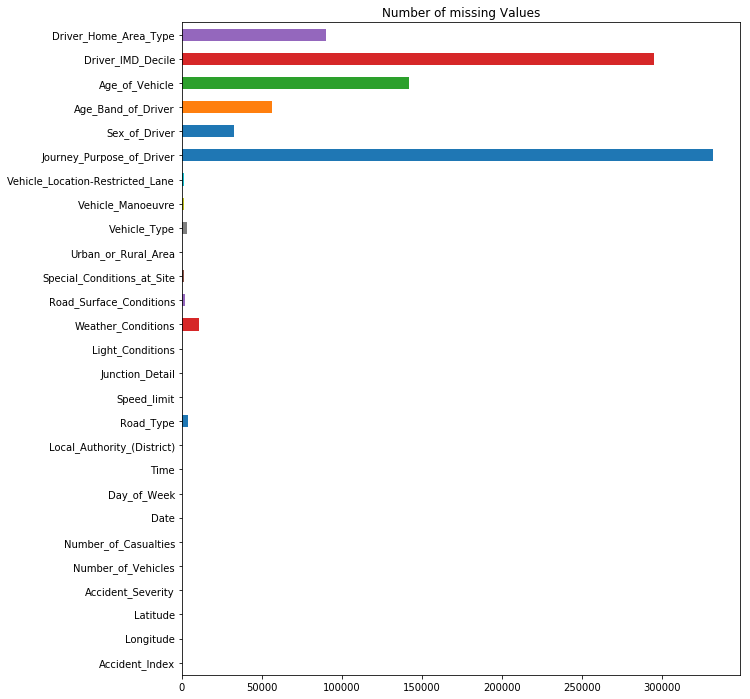

In [62]:
cols =  ['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type']
df1516[cols].isnull().sum().plot(kind='barh', figsize=(10,12), title='Number of missing Values')

## 5.2
## Handling null values

### Question One:

### (A) and (B)
Directly below are the columns we have decided to use to answer research Q1 parts A and B. We will then make a copy of these columns from the 'df1516' dataset.

In [63]:
cols_Q1AB = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver']

In [64]:
df_1516_Q1AB = df1516[cols_Q1AB].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [65]:
df_1516_Q1AB.isnull().sum()

Accident_Index                    0
Accident_Severity                 0
Number_of_Vehicles                0
Number_of_Casualties              0
Date                              0
Day_of_Week                       0
Time                             37
Local_Authority_(District)        0
Light_Conditions                 25
Weather_Conditions            10543
Road_Surface_Conditions        1739
Vehicle_Type                   2985
Sex_of_Driver                 32656
Age_Band_of_Driver            55995
dtype: int64

In [66]:
new_1516_Q1AB = df_1516_Q1AB.dropna(subset=['Time', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
                                            'Vehicle_Type', 'Sex_of_Driver', 'Age_Band_of_Driver'])

new_1516_Q1AB.shape

(410860, 14)

### (C)

Unfortunately for Q1 part C: _"Are people who drive for work more dangerous than recreational drivers?"_ our Journey_Purpose_of_Driver columns is essential for answering this question. Therefore, we cannot use this dataset for this question.

### Question Two:

### (A)
Directly below are the columns we have decided to use to answer research Q2 part A. We will then make a copy of these columns from the 'df1516' dataset.

In [67]:
cols_Q2A = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver', 'Age_of_Vehicle']

In [68]:
df_1516_Q2A = df1516[cols_Q2A].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [69]:
df_1516_Q2A.isnull().sum()

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Time                              37
Local_Authority_(District)         0
Light_Conditions                  25
Weather_Conditions             10543
Road_Surface_Conditions         1739
Special_Conditions_at_Site      1037
Vehicle_Type                    2985
Vehicle_Manoeuvre               1081
Sex_of_Driver                  32656
Age_of_Vehicle                141504
dtype: int64

In [70]:
new_1516_Q2A = df_1516_Q2A.dropna(subset=['Time', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver', 'Age_of_Vehicle'])

new_1516_Q2A.shape

(319026, 16)

### (B)
Directly below are the columns we have decided to use to answer research Q2 part B. We will then make a copy of these columns from the 'df1516' dataset.

In [71]:
cols_Q2B = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver']

In [72]:
df_1516_Q2B = df1516[cols_Q2B].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [73]:
df_1516_Q2B.isnull().sum()

Accident_Index                    0
Accident_Severity                 0
Number_of_Vehicles                0
Number_of_Casualties              0
Date                              0
Day_of_Week                       0
Time                             37
Local_Authority_(District)        0
Light_Conditions                 25
Weather_Conditions            10543
Road_Surface_Conditions        1739
Special_Conditions_at_Site     1037
Vehicle_Type                   2985
Vehicle_Manoeuvre              1081
Sex_of_Driver                 32656
dtype: int64

In [74]:
new_1516_Q2B = df_1516_Q2B.dropna(subset=['Time', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site','Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver'])

new_1516_Q2B.shape

(434637, 15)

### Question Three:

### (A)
Directly below are the columns we have decided to use to answer research Q3 part A. We will then make a copy of these columns from the 'df1516' dataset.

In [75]:
cols_Q3A = ['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Speed_limit',
       'Junction_Detail', 'Urban_or_Rural_Area', 'Vehicle_Type', 
       'Vehicle_Location-Restricted_Lane', 'Sex_of_Driver']

In [76]:
df_1516_Q3A = df1516[cols_Q3A].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [77]:
df_1516_Q3A.isnull().sum()

Accident_Index                          0
Longitude                              65
Latitude                               65
Accident_Severity                       0
Number_of_Vehicles                      0
Number_of_Casualties                    0
Date                                    0
Day_of_Week                             0
Time                                   37
Local_Authority_(District)              0
Speed_limit                            65
Junction_Detail                       162
Urban_or_Rural_Area                    12
Vehicle_Type                         2985
Vehicle_Location-Restricted_Lane     1093
Sex_of_Driver                       32656
dtype: int64

In [78]:
new_1516_Q3A = df_1516_Q3A.dropna(subset=['Longitude', 'Latitude', 'Time', 'Speed_limit', 'Junction_Detail', 
                                 'Urban_or_Rural_Area', 'Vehicle_Type', 'Vehicle_Location-Restricted_Lane', 'Sex_of_Driver'])

new_1516_Q3A.shape

(443646, 16)

### (B)
Directly below are the columns we have decided to use to answer research Q3 part B. We will then make a copy of these columns from the 'df1516' dataset.

In [79]:
cols_Q3B = ['Accident_Index', 'Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 
            'Day_of_Week', 'Local_Authority_(District)','Special_Conditions_at_Site', 'Urban_or_Rural_Area', 'Vehicle_Type', 
            'Sex_of_Driver', 'Driver_IMD_Decile'
           ]

In [80]:
df_1516_Q3B = df1516[cols_Q3B].copy()

#### Dropping Rows with Missing Values

We create a new dataframe by using dropna to drop any rows with missing values in the columns provided. 

In [81]:
df_1516_Q3B.isnull().sum()

Accident_Index                     0
Longitude                         65
Latitude                          65
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Local_Authority_(District)         0
Special_Conditions_at_Site      1037
Urban_or_Rural_Area               12
Vehicle_Type                    2985
Sex_of_Driver                  32656
Driver_IMD_Decile             294613
dtype: int64

In [82]:
new_1516_Q3B = df_1516_Q3B.dropna(subset=['Longitude', 'Latitude', 'Special_Conditions_at_Site', 'Urban_or_Rural_Area', 
                                          'Vehicle_Type', 'Sex_of_Driver', 'Driver_IMD_Decile'])

new_1516_Q3B.shape

(183141, 13)

# 6. Saving Data to Pickle Files

## 7904c

In [83]:
pickle_save_time = %timeit -o new_7904c_Q1AB.to_pickle("../../data/processed/600_prep_missing_values_7904c_Q1AB.pkl")

pickle_save_time

15.6 s ± 3.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 15.6 s ± 3.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [84]:
pickle_save_time = %timeit -o new_7904c_Q2A.to_pickle("../../data/processed/600_prep_missing_values_7904c_Q2A.pkl")

pickle_save_time

13.8 s ± 2.9 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 13.8 s ± 2.9 s per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [85]:
pickle_save_time = %timeit -o new_7904c_Q2B.to_pickle("../../data/processed/600_prep_missing_values_7904c_Q2B.pkl")

pickle_save_time

20.2 s ± 9.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 20.2 s ± 9.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [86]:
pickle_save_time = %timeit -o new_7904c_Q3A.to_pickle("../../data/processed/600_prep_missing_values_7904c_Q3A.pkl")

pickle_save_time

2.06 s ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 2.06 s ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [87]:
pickle_save_time = %timeit -o new_7904c_Q3B.to_pickle("../../data/processed/600_prep_missing_values_7904c_Q3B.pkl")

pickle_save_time

798 ms ± 65.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 798 ms ± 65.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

## 7904d

In [88]:
pickle_save_time = %timeit -o new_7904d_Q1AB.to_pickle("../../data/processed/600_prep_missing_values_7904d_Q1AB.pkl")

pickle_save_time

9.61 s ± 1.36 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 9.61 s ± 1.36 s per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [89]:
pickle_save_time = %timeit -o new_7904d_Q2A.to_pickle("../../data/processed/600_prep_missing_values_7904d_Q2A.pkl")

pickle_save_time

8.01 s ± 2.68 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 8.01 s ± 2.68 s per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [90]:
pickle_save_time = %timeit -o new_7904d_Q2B.to_pickle("../../data/processed/600_prep_missing_values_7904d_Q2B.pkl")

pickle_save_time

9.77 s ± 675 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 9.77 s ± 675 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [91]:
pickle_save_time = %timeit -o new_7904d_Q3A.to_pickle("../../data/processed/600_prep_missing_values_7904d_Q3A.pkl")

pickle_save_time

11.5 s ± 422 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 11.5 s ± 422 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [92]:
pickle_save_time = %timeit -o new_7904d_Q3B.to_pickle("../../data/processed/600_prep_missing_values_7904d_Q3B.pkl")

pickle_save_time

4.27 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 4.27 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

## 1516

In [93]:
pickle_save_time = %timeit -o new_1516_Q1AB.to_pickle("../../data/processed/600_prep_missing_values_1516_Q1AB.pkl")

pickle_save_time

1.82 s ± 60.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 1.82 s ± 60.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [94]:
pickle_save_time = %timeit -o new_1516_Q2A.to_pickle("../../data/processed/600_prep_missing_values_1516_Q2A.pkl")

pickle_save_time

1.85 s ± 387 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 1.85 s ± 387 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [95]:
pickle_save_time = %timeit -o new_1516_Q2B.to_pickle("../../data/processed/600_prep_missing_values_1516_Q2B.pkl")

pickle_save_time

2.94 s ± 562 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 2.94 s ± 562 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [96]:
pickle_save_time = %timeit -o new_1516_Q3A.to_pickle("../../data/processed/600_prep_missing_values_1516_Q3A.pkl")

pickle_save_time

3.09 s ± 418 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 3.09 s ± 418 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [97]:
pickle_save_time = %timeit -o new_1516_Q3B.to_pickle("../../data/processed/600_prep_missing_values_1516_Q3B.pkl")

pickle_save_time

590 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 590 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

# 7. Creating Data Dictionaries
Below we will create a data dictionary for each of the pickle files created above.

## 7904c

In [98]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904c_Q1AB.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (c) Q1AB.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2695080,1580761,199722AX01148,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2695080,3,slight,2258037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.69508e+06,NaN,NaN,NaN,2.10865,1.23336,1,2,2,2,88,0,0.0
Number_of_Casualties,2.69508e+06,NaN,NaN,NaN,1.45249,1.12432,1,1,1,2,80,0,0.0
Date,2695080,2922,25/04/1997,2249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [99]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904c_Q2A.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (c) Q2A.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2033305,1356471,199722AX01148,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2033305,3,slight,1708165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.03330e+06,NaN,NaN,NaN,2.11651,1.28066,1,2,2,2,88,0,0.0
Number_of_Casualties,2.03330e+06,NaN,NaN,NaN,1.48016,1.15529,1,1,1,2,80,0,0.0
Date,2033305,2922,25/04/1997,1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [100]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904c_Q2B.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (c) Q2B.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2808172,1601244,199722AX01148,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2808172,3,slight,2360453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.80817e+06,NaN,NaN,NaN,2.11006,1.24005,1,2,2,2,88,0,0.0
Number_of_Casualties,2.80817e+06,NaN,NaN,NaN,1.44308,1.11435,1,1,1,2,80,0,0.0
Date,2808172,2922,25/04/1997,2338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [101]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904c_Q3A.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (c) Q3A.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,448332,255337,199906X003078,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Longitude,448332,NaN,NaN,NaN,-1.30777,1.36244,-7.51329,-2.23282,-1.20568,-0.146515,1.75861,0,0.0
Latitude,448332,NaN,NaN,NaN,52.4494,1.35974,49.9143,51.49,51.881,53.4007,60.6934,0,0.0
Accident_Severity,448332,3,slight,383913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,448332,NaN,NaN,NaN,2.09859,0.906971,1,2,2,2,24,0,0.0


In [102]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904c_Q3B.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (c) Q3B.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,199269,135161,199904C114499,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Longitude,199269,NaN,NaN,NaN,-0.95201,1.06636,-6.19752,-1.85632,-0.632886,-0.097659,1.75861,0,0.0
Latitude,199269,NaN,NaN,NaN,52.253,1.0293,50.5621,51.5052,51.7792,53.0498,58.574,0,0.0
Number_of_Vehicles,199269,NaN,NaN,NaN,2.09991,0.900493,1,2,2,2,24,0,0.0
Number_of_Casualties,199269,NaN,NaN,NaN,1.42582,0.898844,1,1,1,2,36,0,0.0


## 7904d

In [103]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904d_Q1AB.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (d) Q1AB.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,1725560,1018143,2003070300788,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,1725560,3,slight,1478128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,1.72556e+06,NaN,NaN,NaN,2.11908,0.948569,1,2,2,2,66,0,0.0
Number_of_Casualties,1.72556e+06,NaN,NaN,NaN,1.46918,1.00673,1,1,1,2,90,0,0.0
Date,1725560,1827,25/10/2002,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [104]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904d_Q2A.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (d) Q2A.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,1242776,835645,2003070300788,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,1242776,3,slight,1068500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,1.24278e+06,NaN,NaN,NaN,2.13035,0.979638,1,2,2,2,66,0,0.0
Number_of_Casualties,1.24278e+06,NaN,NaN,NaN,1.49748,1.02673,1,1,1,2,90,0,0.0
Date,1242776,1827,26/05/2000,1280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [105]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904d_Q2B.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (d) Q2B.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,1818065,1033652,2003070300788,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,1818065,3,slight,1562694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,1.81806e+06,NaN,NaN,NaN,2.121,0.95333,1,2,2,2,66,0,0.0
Number_of_Casualties,1.81806e+06,NaN,NaN,NaN,1.45772,0.994761,1,1,1,2,90,0,0.0
Date,1818065,1827,25/10/2002,1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [106]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904d_Q3A.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (d) Q3A.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,1842428,1048572,2003070300788,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Longitude,1.84243e+06,NaN,NaN,NaN,-1.48169,1.37761,-7.53617,-2.38622,-1.47043,-0.291916,1.76059,0,0.0
Latitude,1.84243e+06,NaN,NaN,NaN,52.6002,1.41651,49.9128,51.502,52.4054,53.4766,60.8017,0,0.0
Accident_Severity,1842428,3,slight,1584818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,1.84243e+06,NaN,NaN,NaN,2.11902,0.951949,1,2,2,2,66,0,0.0


In [107]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_7904d_Q3B.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 1979 - 2004 (d) Q3B.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,1047006,685687,2003070300788,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Longitude,1.04701e+06,NaN,NaN,NaN,-1.17298,1.09895,-7.52928,-2.10025,-1.29437,-0.209758,1.7585,0,0.0
Latitude,1.04701e+06,NaN,NaN,NaN,52.4245,1.07209,50.3271,51.5138,52.3573,53.3988,60.2478,0,0.0
Number_of_Vehicles,1.04701e+06,NaN,NaN,NaN,2.13589,0.94588,1,2,2,2,40,0,0.0
Number_of_Casualties,1.04701e+06,NaN,NaN,NaN,1.46967,0.980082,1,1,1,2,67,0,0.0


## 1516

In [108]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_1516_Q1AB.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 2015 - 2016 Q1AB.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,410860,242835,201543P296025,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,410860,3,slight,346146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,410860,NaN,NaN,NaN,2.11064,0.890711,1,2,2,2,37,0,0.0
Number_of_Casualties,410860,NaN,NaN,NaN,1.43521,0.976626,1,1,1,2,58,0,0.0
Date,410860,731,25/11/2016,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [109]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_1516_Q2A.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 2015 - 2016 Q2A.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,319026,210195,201543P296025,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,319026,3,slight,271034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,319026,NaN,NaN,NaN,2.12061,0.919788,1,2,2,2,37,0,0.0
Number_of_Casualties,319026,NaN,NaN,NaN,1.46472,0.998059,1,1,1,2,58,0,0.0
Date,319026,731,15/01/2016,708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [110]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_1516_Q2B.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 2015 - 2016 Q2B.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,434637,247212,201543P296025,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,434637,3,slight,367926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,434637,NaN,NaN,NaN,2.10887,0.885776,1,2,2,2,37,0,0.0
Number_of_Casualties,434637,NaN,NaN,NaN,1.42344,0.960998,1,1,1,2,58,0,0.0
Date,434637,731,25/11/2016,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [111]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_1516_Q3A.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 2015 - 2016 Q3A.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,443646,252737,201543P296025,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Longitude,443646,NaN,NaN,NaN,-1.38275,1.39311,-7.42291,-2.26736,-1.31449,-0.192573,1.75844,0,0.0
Latitude,443646,NaN,NaN,NaN,52.5637,1.40423,49.9156,51.5098,52.2383,53.4405,60.6611,0,0.0
Accident_Severity,443646,3,slight,375927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,443646,NaN,NaN,NaN,2.10691,0.882811,1,2,2,2,37,0,0.0


In [112]:
data_dictionary.save(
    '../../data/processed/600_prep_missing_values_1516_Q3B.pkl', 

"""\
Aggregate raw data for UK Road Safety data for years 2015 - 2016 Q3B.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,183141,112492,2016460044087,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Longitude,183141,NaN,NaN,NaN,-1.06717,1.22646,-6.4774,-1.9034,-1.04605,-0.130762,1.75786,0,0.0
Latitude,183141,NaN,NaN,NaN,52.2453,1.11751,49.9197,51.4398,51.8625,53.1587,58.5948,0,0.0
Number_of_Vehicles,183141,NaN,NaN,NaN,2.1179,0.835586,1,2,2,2,16,0,0.0
Number_of_Casualties,183141,NaN,NaN,NaN,1.42863,0.910948,1,1,1,2,58,0,0.0
